# Seaborn refresher
April 17, 2021

In [2]:
import seaborn as sns
import numpy as np
import pandas as pd

In [19]:
x = np.linspace(0, 100, 100)
y = x**3

In [42]:
df = pd.DataFrame(x)
df['y'] = y
df = df.rename(columns = {df.columns[0]: 'x'})

In [43]:
df.head()

,x,y
0,0.000000,0.000000
1,1.010101,1.030610
2,2.020202,8.244881
3,3.030303,27.826474
4,4.040404,65.959050


## 1. Jointplot with line of best fit

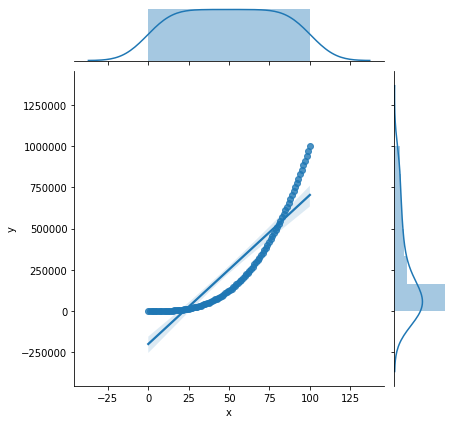

In [48]:
sns.jointplot(x='x', y='y', data = df, kind='reg')

## 2. Heatmap

In [49]:
df.corr()

,x,y
x,1.000000,0.915516
y,0.915516,1.000000


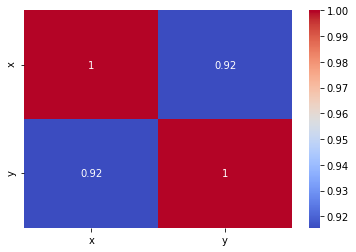

In [52]:
sns.heatmap(df.corr(), cmap = 'coolwarm', annot=True)

# Load in new dataset

In [54]:
df = sns.load_dataset('tips')

In [55]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [57]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


## 3. Correlation and heatmap

In [58]:
df.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


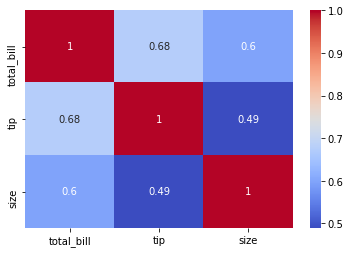

In [61]:
sns.heatmap(df.corr(), cmap='coolwarm', annot = True)

### Pivot table

In [62]:
df.pivot_table(values = 'tip', index = 'day', columns = 'size')

size,1,2,3,4,5,6
day,,,,,,
Thur,1.83,2.442500,2.692500,4.218000,5.000000,5.3
Fri,1.92,2.644375,3.000000,4.730000,NaN,NaN
Sat,1.00,2.517547,3.797778,4.123846,3.000000,NaN
Sun,NaN,2.816923,3.120667,4.087778,4.046667,5.0


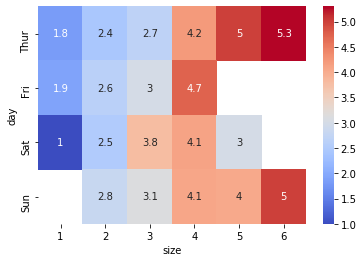

In [64]:
pivot = df.pivot_table(values = 'tip', index = 'day', columns = 'size')
sns.heatmap(pivot, cmap='coolwarm', annot=True)